In [28]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [31]:
train_data = pd.read_csv('train_all_features.csv') # train data
test_data = pd.read_csv("test_all_features.csv") # test data
train_label = pd.read_csv("../trainLabels.csv") # train labels
test_label = pd.read_csv("../testLabels.csv") # test labels

train_data

,Id,__imp_iswindow,__imp_loadbitmapa,__imp_iswindowenabled,__imp_mapwindowpoints,__imp_mapvirtualkeya,__imp_lineto,__imp_registerclipboardformata,__imp_ptinrect,__imp_screentoclient,...,00F645D0,31000068,68DA0000,3C000068,2D00006A,74656C6C,0C000075,18000081,7711,000085C2
0,2vfzAkDRd5PYmSwVqWx7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DrSkvafcTm2A4BNzdVUt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CL5Moas9hliPGv6nYSyj,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,ArclRISTQmqu617NfztD,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,30htxi8FRcmfUkInewlS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,Chq2jb7PZtFyi9S3eYUA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5249,8Z5zugCOx3cTB6ikpbSq,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5250,3U1TuQLner70z6HFRVgb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5251,b8yqURFwVf7KdLlH64TQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# From this cell to a few below cells, I'm going to manipulate the data into numpy that can be fitted to XGBoost.
train_data_with_labels = pd.merge(train_data, train_label, on="Id")
test_data_with_labels = pd.merge(test_data, test_label, on="Id")

test_data_with_labels

,Unnamed: 0,Id,__imp_iswindow,__imp_loadbitmapa,__imp_iswindowenabled,__imp_mapwindowpoints,__imp_mapvirtualkeya,__imp_lineto,__imp_registerclipboardformata,__imp_ptinrect,...,cmc,sti,jecxz,jbe,push,div_y,dec,shl,cmp,Class
0,0,bI76Nj2rwaBMqJc1FxDQ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53,4,2
1,1,IrD2NqBzMT4euJQbXyv0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75,666,9
2,2,fiwJGn6gUtXlk1NZoFAS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,31,177,8
3,3,H8g7nCGOSqwQ14kAozmt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,179,8
4,4,hgjwNAdHsBlEU3QZLbWC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1327,9vP6c42rE30zVNlT8AJO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,3
1328,1328,JBGVawO7uqtxM103PbNy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,67,515,9
1329,1329,DSUK5GaL9s8tA3PfhZTJ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,789,1
1330,1330,7Z0lLsb5Pr6wNjzRDTdH,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,3


In [10]:
train_complete_numpy = train_data_with_labels.to_numpy().T
test_complete_numpy = test_data_with_labels.to_numpy().T

test_complete_numpy

array([[0, 1, 2, ..., 1329, 1330, 1331],
       ['bI76Nj2rwaBMqJc1FxDQ', 'IrD2NqBzMT4euJQbXyv0',
        'fiwJGn6gUtXlk1NZoFAS', ..., 'DSUK5GaL9s8tA3PfhZTJ',
        '7Z0lLsb5Pr6wNjzRDTdH', 'eqmi7Zsy6ordaXkbYC9G'],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [53, 75, 31, ..., 7, 0, 10],
       [4, 666, 177, ..., 789, 9, 500],
       [2, 9, 8, ..., 1, 3, 1]], dtype=object)

In [36]:
train_data = train_complete_numpy[2:-1].T
train_label = train_complete_numpy[-1] - 1 # since XGBoost take labels as 0 ~ num_class -1, have to subtract 1
test_data = test_complete_numpy[2:-2].T
test_label = test_complete_numpy[-1] - 1

In [37]:
train = xgb.DMatrix(train_data, label = train_label)
test = xgb.DMatrix(test_data, label = test_label)

In [38]:
param = {'max_depth': 4, 'eta':0.3, 'objective':'multi:softmax','num_class':9 }
epochs = 10

In [39]:
model = xgb.train(param, train, epochs) # model training

In [40]:
prediction = model.predict(test)

In [41]:
print(prediction)
print(test_label)

[1. 8. 7. ... 0. 2. 0.]
[1 8 7 ... 0 2 0]


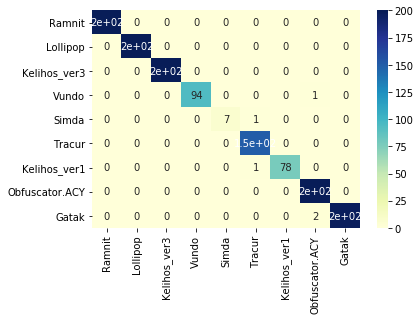

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
c = confusion_matrix(test_label.astype(np.int8), prediction)

classes = ["Ramnit",
"Lollipop",
"Kelihos_ver3",
"Vundo",
"Simda",
"Tracur",
"Kelihos_ver1",
"Obfuscator.ACY",
"Gatak"]

df_cm = pd.DataFrame(c, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label.astype(np.int8), prediction)

0.9962462462462462

In [44]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision = (tp*1.0/tp_fp)
recall = (tp*1.0/tp_fn)

In [45]:
pd.DataFrame([precision, recall],
                         columns = ["Ramnit", "Lollipop", "Kelihos_ver3", "Vundo", "Simda", "Tracur", "Kelihos_ver1", "Obfuscator.ACY", "Gatak"],
                         index = ['Precision', 'Recall'] )

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,1.0,1.0,1.0,1.000000,1.000,0.986842,1.000000,0.985222,1.00
Recall,1.0,1.0,1.0,0.989474,0.875,1.000000,0.987342,1.000000,0.99
